In [2]:
!pip install scikeras

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import os

In [4]:
try:
    previsores = pd.read_csv('dados_breast.csv')  # Remova o header=None
    classes = pd.read_csv('rotulos_breast.csv')
except FileNotFoundError:
    print("Erro: Arquivos 'dados_breast.csv' ou 'rotulos_breast.csv' não encontrados.")
    print("Por favor, coloque os arquivos de dados no mesmo diretório do script.")
    exit()

In [5]:
print("--- Amostra dos Atributos (Previsores) ---")
print(previsores.head())
print("\n--- Amostra das Classes (Rótulos) ---")
print(classes.head())

--- Amostra dos Atributos (Previsores) ---
    radius_mean   texture_mean   perimeter_mean   area_mean   smoothness_mean  \
0         17.99          10.38           122.80      1001.0           0.11840   
1         20.57          17.77           132.90      1326.0           0.08474   
2         19.69          21.25           130.00      1203.0           0.10960   
3         11.42          20.38            77.58       386.1           0.14250   
4         20.29          14.34           135.10      1297.0           0.10030   

    compactness_mean   concavity_mean  concave_points_mean   symmetry_mean  \
0            0.27760           0.3001              0.14710          0.2419   
1            0.07864           0.0869              0.07017          0.1812   
2            0.15990           0.1974              0.12790          0.2069   
3            0.28390           0.2414              0.10520          0.2597   
4            0.13280         198.0000              0.10430          0.1809   

 

In [6]:
# 1) Quantos exemplos e atributos a base de dados possui?
print(f"\nDimensões da base de dados (exemplos, atributos): {previsores.shape}\n")


Dimensões da base de dados (exemplos, atributos): (569, 30)



In [7]:
previsores_treinamento, previsores_teste, classes_treinamento, classes_teste = train_test_split(previsores, classes, test_size=0.25, random_state=0)
print("Dados divididos em conjuntos de treinamento e teste.")

Dados divididos em conjuntos de treinamento e teste.


In [8]:
# 2) A RNA foi criada com quantas camadas? Quantos neurônios em cada? Qual a função de ativação de cada uma?
# 3) Por que a camada de saída possui apenas 1 neurônio?
# 4) Por que a função de ativação da camada de saída é a Sigmoid?
# Respostas: Ver relatório final. A arquitetura está definida abaixo.
classificador = keras.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu', kernel_initializer='random_uniform', input_dim=30),
    tf.keras.layers.Dense(units=16, activation='relu', kernel_initializer='random_uniform'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
def imprimir_pesos(modelo, titulo):
    print(f"\n--- {titulo} ---")
    pesos = modelo.get_weights()
    for i, camada_pesos in enumerate(pesos):
        print(f"Formato da Camada {i}: {camada_pesos.shape}")
    print("--------------------------------------\n")

In [10]:
# 5) Os pesos da RNA são inicializados com quais valores?
imprimir_pesos(classificador, "Pesos Antes do Treinamento (Valores Iniciais)")


--- Pesos Antes do Treinamento (Valores Iniciais) ---
Formato da Camada 0: (30, 16)
Formato da Camada 1: (16,)
Formato da Camada 2: (16, 16)
Formato da Camada 3: (16,)
Formato da Camada 4: (16, 1)
Formato da Camada 5: (1,)
--------------------------------------



In [11]:
# 6) O que é o otimizador e a função de perda? Por que `binary_crossentropy`?
classificador.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [12]:
print("Iniciando o treinamento do modelo...")
historico = classificador.fit(previsores_treinamento, classes_treinamento,
                            batch_size=10, epochs=100,
                            validation_data=(previsores_teste, classes_teste),
                            verbose=1) # verbose=1 para ver o progresso
print("Treinamento concluído.")

Iniciando o treinamento do modelo...
Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - binary_accuracy: 0.6284 - loss: 1.6991 - val_binary_accuracy: 0.6364 - val_loss: 0.5001
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.6566 - loss: 0.5081 - val_binary_accuracy: 0.7483 - val_loss: 0.4819
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.7175 - loss: 0.4940 - val_binary_accuracy: 0.7133 - val_loss: 0.4941
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.7398 - loss: 0.4659 - val_binary_accuracy: 0.8392 - val_loss: 0.3858
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.8361 - loss: 0.3867 - val_binary_accuracy: 0.8322 - val_loss: 0.3984
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.8344 - loss: 0.3869 - val_binary_accuracy: 0.8531 - val_loss: 0.3444
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9113 - loss: 0.3094 - val_binary_accuracy: 0.

In [13]:
# 7) Compare os pesos antes e depois do treinamento. O que aconteceu?
imprimir_pesos(classificador, "Pesos Após o Treinamento")


--- Pesos Após o Treinamento ---
Formato da Camada 0: (30, 16)
Formato da Camada 1: (16,)
Formato da Camada 2: (16, 16)
Formato da Camada 3: (16,)
Formato da Camada 4: (16, 1)
Formato da Camada 5: (1,)
--------------------------------------



In [14]:
# 8) Os valores de acurácia e perda da base de treinamento melhoraram ao longo das épocas?
print("\nPlotando gráficos de acurácia e perda...")
plt.figure(figsize=(12, 5))


Plotando gráficos de acurácia e perda...


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

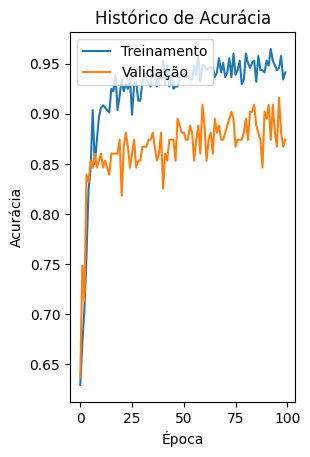

In [15]:
plt.subplot(1, 2, 1)
plt.plot(historico.history['binary_accuracy'])
plt.plot(historico.history['val_binary_accuracy'])
plt.title('Histórico de Acurácia')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'], loc='upper left')

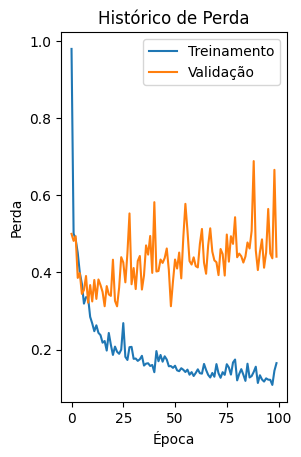

In [16]:
plt.subplot(1, 2, 2)
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Histórico de Perda')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'], loc='upper right')

In [17]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [18]:
# 9) Qual foi o resultado da acurácia na base de teste?
print("\nAvaliando o modelo no conjunto de teste...")
resultado_teste = classificador.evaluate(previsores_teste, classes_teste, verbose=0)
print(f"Perda no teste: {resultado_teste[0]:.4f}")
print(f"Acurácia no teste: {resultado_teste[1]:.4f}")


Avaliando o modelo no conjunto de teste...
Perda no teste: 0.4409
Acurácia no teste: 0.8741


In [19]:
# 10) Qual o resultado da matriz de confusão na base de teste?
previsoes = classificador.predict(previsores_teste)
previsoes_binarias = (previsoes > 0.5)
matriz = confusion_matrix(classes_teste, previsoes_binarias)
print("\nMatriz de Confusão:")
print(matriz)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

Matriz de Confusão:
[[43 10]
 [ 8 82]]


In [20]:
# 11) Por que usar a Validação Cruzada?
# 12) O que faz o 'KerasClassifier'?

def criar_rna_cv():
    modelo = keras.Sequential([
        tf.keras.layers.Dense(units=16, activation='relu', kernel_initializer='random_uniform', input_dim=30),
        tf.keras.layers.Dense(units=16, activation='relu', kernel_initializer='random_uniform'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])
    modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
    return modelo

In [21]:
print("\nIniciando a Validação Cruzada (10 folds)...")
classificador_cv = KerasClassifier(build_fn=criar_rna_cv, epochs=100, batch_size=10, verbose=0)


Iniciando a Validação Cruzada (10 folds)...


In [22]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

In [23]:
resultados_cv = cross_val_score(classificador_cv, previsores, classes.values.ravel(), cv=kfold)
print("Validação Cruzada concluída.")

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
# 13) Quais os resultados da validação cruzada?
print(f"\nResultados (acurácia) de cada fold: {np.round(resultados_cv, 4)}")

In [ ]:
# 14) Qual a média e o desvio padrão dos resultados?
print(f"Média das acurácias: {resultados_cv.mean():.4f}")
print(f"Desvio padrão das acurácias: {resultados_cv.std():.4f}")

In [ ]:
def criar_rna_tuning(optimizer='adam', loss='binary_crossentropy', kernel_initializer='random_uniform', activation='relu', neurons=16):
    modelo = keras.Sequential([
        tf.keras.layers.Dense(units=neurons, activation=activation, kernel_initializer=kernel_initializer, input_dim=30),
        tf.keras.layers.Dense(units=neurons, activation=activation, kernel_initializer=kernel_initializer),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])
    modelo.compile(optimizer=optimizer, loss=loss, metrics=['binary_accuracy'])
    return modelo

classificador_gs = KerasClassifier(build_fn=criar_rna_tuning, verbose=0)

In [ ]:
parametros = {
    'batch_size': [10, 30],
    'epochs': [50, 100],
    'optimizer': ['adam', 'sgd'],
    'loss': ['binary_crossentropy', 'hinge'],
    'kernel_initializer': ['random_uniform', 'normal'],
    'activation': ['relu', 'tanh'],
    'neurons': [16, 8]
}

In [ ]:
print("\nIniciando a Otimização com GridSearchCV (pode levar vários minutos)...")
grid_search = GridSearchCV(estimator=classificador_gs, param_grid=parametros, scoring='accuracy', cv=5)
grid_search.fit(previsores, classes.values.ravel())
print("GridSearchCV concluído.")

In [ ]:
# 15) Quais os melhores parâmetros encontrados?
melhores_parametros = grid_search.best_params_
melhor_precisao = grid_search.best_score_

In [ ]:
print("\nMelhores parâmetros encontrados:")
print(melhores_parametros)
print(f"\nMelhor precisão encontrada (acurácia média): {melhor_precisao:.4f}")

In [ ]:
# 16) É possível melhorar ainda mais a acurácia da RNA? Como?
# Resposta: Sim, com engenharia de atributos, mais dados, busca de hiperparâmetros mais ampla, regularização, etc.

In [ ]:
print("\nSalvando o modelo treinado...")
caminho_modelo = 'classificador_breast.keras'
classificador.save(caminho_modelo)
print(f"Modelo salvo em '{caminho_modelo}'")

In [ ]:
if os.path.exists(caminho_modelo):
    print("\nCarregando o modelo salvo...")
    classificador_novo = tf.keras.models.load_model(caminho_modelo)
    print("Modelo carregado com sucesso.")

    # Exemplo de predição com o modelo carregado
    novo_exemplo = previsores_teste.iloc[0:1]
    previsao_nova = classificador_novo.predict(novo_exemplo)
    print(f"\nPredição para um novo exemplo: {previsao_nova[0][0]:.4f}")
    print(f"Classe prevista: {'Maligno' if previsao_nova[0][0] > 0.5 else 'Benigno'}")
else:
    print(f"\nArquivo de modelo '{caminho_modelo}' não encontrado para carregar.")

print("\n--- FIM DO SCRIPT ---")